# DND interactive map manager

Greetings! Here I have something extremely useful for DND players and DMs who struggle on taking track of initiatives, HP, AC, position, etc during dnd battles or just to locate characters, thats the purpose of this dnd interactive map manager.
This code is destinated to all DMs who wants to improve the way of taking track of characters stats and position and does not require too much knowledge of python coding, only prerequisites are having installed the required libraries (if you are using Jupyter Notebook installed from Anaconda, then all the libraries are preinstalled and you just need to call them by running the cell "Required libraries")

This code is divided in 4 steps.

#### 1) Required libraries
#### 2) Characters, HP, AC, Conditions
#### 3) Characters matrix
#### 4) DND Map

Following each step on that order will give you the desired result, skiping steps or modify the code (unless specified in the steps) will probably break it forever, so, follow the steps and enjoy!

### Required libraries

Nothing special here, just run this cell, if you get an error, then you do not have the library installed on your desktop, for that just open your terminal (command prompt in Windows, terminal in ubuntu/mac) and type "pip install {name of the library}" 

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

### Characters HP, AC, Conditions

The main structure of this code is basically a matrix (the big table of different variable showed) where we can put the required information of any number of characters we require for the battle, the table has this format, you can also guide yourself with the characters already used in the code.

|Name        |Turn             |HP             |AC             |Conditions             |Color             |Position(x,y)|   Size             |
|:----------:|:---------------:|:-------------:|:-------------:|:---------------------:|:----------------:|:-----------------:|:---------------:|
|Character1  |character1 turn  |character1 HP  |character1 AC  |character1 conditions  |character1 color  |character1 position  |character1 size  |
|Character2  |character2 turn  |character2 HP  |character2 AC  |character2 conditions  |character2 color  |character2 position  |character2 size  |
|Character3  |character3 turn  |character3 HP  |character3 AC  |character3 conditions  |character3 color  |character3 position  |character3 size  |
|Character4  |character4 turn  |character4 HP  |character4 AC  |character4 conditions  |character4 color  |character4 position  |character4 size  |
|...         |...              |...            |...            |...                    |...               ||...              |

 ____________________________________________________________

|  |  |
|:----|:------|
|**Name**| is the cell where we put the name of the character in the string format form (the name in parenthesis, like this "Daniel") if not, it will throw an error and it will not display the name of the character|
|**Turn**| is the initiative roll your characters get before the battle, you just type the initiative they got as a number for each character|
|**HP**| is the HP your characters currently have, you just type the number of the HP, if you want to modify it during the battle, just change the number by the actual number you want, or directly you can type a math operation (for example, when your character has 40 HP and loses 6, instead of write 34, you could write 40-6 and the output will still be 34), however, there may be cases when the DM wants to hide the HP or the AC of a character for everyone except himself, so, instead of writing the HP number inside the corresponding matrix cell, we are going to create a variable outside the cell where the matrix is located, we are going to name it with the name of the character, and we are going to store the HP value, and another one named "??" like this **Daniel_HP=["??",5]**, as you see, we have the ?? and the number assigned in the same variable as a list, the list has the two values, but we are going to plug the variable in the place corresponding to the character like this **Daniel_HP[0]**, if we put [0], the players will see a ??, if we put a [1], the players will see the actual HP, if you want to change the HP, just go to the variable where is the number and modify it depending om the situation, like this **Daniel_HP=["??", 5-2]** or plug the actual result like this **Daniel_HP=["??", 3]**, remember to do that with all the your NPCs you do not want the players to know their HP or AC|
|**AC**| is the AC your characters currently have, you just type the number of the AC, if you want to modify it during the battle, just change the number by the actual number you want just like the HP|
|**Conditions**| are the conditions your characters currently have, unlike the other conditions, instead of modify that inside the matrix, we just going to make a variable list outside the matrix and inside the list we are going to type all the actual conditions the character have, it is important that each condition is separated by a comma and each word typed be between quotiation marks, the list should look like this: **Daniel_conditions=["prone", "invisible", "blinded"]**, and the variable we named that list should be included on the character condition cell that correspond to the character, if we have no conditions, we let the list empty like this **Daniel_conditions=[]**|
|**Color**| is the color the character have in the map, you just type the color using parenthesis like this "red", all primary and secondary colors are available to choose, but if you want a more specific color, you can check on this link the available colors by just typing the name in parenthesis https://matplotlib.org/stable/gallery/color/named_colors.html|
|**Position**| is the actual position of the character in format x for moving left and right, and y for moving up and down, position format must be given by as [x,y] in the position cell of the matrix, the numbers must be greater than zero and inside the boundaries of the map (for example, on a 20x20 map, you can be in the position [5,12], but not in the position [-32, 76]), you can change them however you like but make sure to preserve the constrains|
|**Size**| is the size the character will have on the map, just type the number that corresponds to an specific size and it will change, if the character is bigger, it will occupate more squares, if it is smaller, it will occupate less squares, the available sizes are 0.1, 0.2, 0.5, 1, 2, 3, 4, 6 *NOTE: if the size of a character is 0.1, 0.2, 0.5, 1 or 3, in the position(x,y) you will add a .5 at the end of each of both coordinates to have the character centered on the square you want to locate it (for example, if you want your character in the [12,6] position centered, you type [12.5, 6.5], if the size is 2, 4, or 6, DO NOT ADD .5 TO THE END OF THE COORDINATES)*|
 

In [2]:
Sun19_HP=["??",34]
enemy2_HP=["??",34]
enemy3_HP=["??",10]
enemy4_HP=["??",10]
enemy5_HP=["??",10]

Sun19_AC=["??",15]
enemy2_AC=["??",18]
enemy3_AC=["??",1]
enemy4_AC=["??",1]
enemy5_AC=["??",1]

Daniel_conditions=[]
Dia_conditions=[]
Niki_conditions=[]
Cecil_conditions=[]
Xander_conditions=[]
Sun19_conditions=[]
enemy2_conditions=[]
enemy3_conditions=[]
enemy4_conditions=[]
enemy5_conditions=[]

### Characters matrix

Here is the character matrix where we are going to put the values and variables that will make work our dnd map, the structure looks like this 

characters= [ [], [], [], [], ......]

Each of those brackets represent one character and the information about that character previously mentioned and structured, it is important to respect the brackets and to make sure each open bracket has a bracket that closes it, if we are sure of that and put all the data as specified before, your character matrix should look like that with all the data assigned

In [3]:
characters= [
#             Name        Turn     HP              AC              Condition             Color       Position(x,y)   size
             ["Daniel",   16,      44,             16,             Daniel_conditions,    "blue",     [10,10],        2],
             ["Dia",      7,       90,             18,             Dia_conditions,       "red",      [9.5,9.5],      1],
             ["Niki",     1,       34,             12,             Niki_conditions,      "red",      [8.5,8.5],      1],
             ["Cecil",    3,       61,             8,              Cecil_conditions,     "green",    [7.5,7.5],      1],
             ["Xander",   14,      50,             14,             Xander_conditions,    "cyan",     [6.5,6.5],      1], 
             ["Sun 19",   16,      Sun19_HP[0],    Sun19_AC[0],    Sun19_conditions,     "purple",   [5.5,5.5],      1],
             ["enemy2",   19,      enemy2_HP[0],   enemy2_AC[0],   enemy2_conditions,    "black",    [4.5,4.5],      1],
             ["enemy3",   -1000,   enemy3_HP[0],   enemy3_AC[0],   enemy3_conditions,    "brown",    [3.5,3.5],      1],
             ["enemy4",   -1000,   enemy4_HP[0],   enemy4_AC[0],   enemy4_conditions,    "brown",    [2.5,2.5],      1],
             ["enemy5",   -1000,   enemy5_HP[0],   enemy5_AC[0],   enemy5_conditions,    "brown",    [1.5,1.5],      1],
             ]

characters.sort(reverse=True, key=lambda y: y[1])

*Note: that each character line is separated on a descending order making sure no characters share the same lines, this is important because, if you want to get rid easily of one character, you just have to type an # at the very beginning of the line you want to get rid, if you do that, the character information would turn into blue and the code will not include it, just like the information never existed, but the code would still be able to run it and plot the correct results.*

At the very bottom of the cell, you will see a line alone, that is the line the sorts all characters with respect to their initiative rolls to plot them in the dnd map in their respective initiative order as a descening list, DO NOT TOUCH THAT LINE!



### DND Map

And here we are! the dnd map! the lines that will plot everything! Basically this cell is already configured based on the parameters previously established so there is little to no stuff to modify here, however, there is still something important to plot, the map.\
The way the code is structured is a code that accepts only maps which areas go from 10x10 to 99x99, it do not accepts numbers of two digits less than 10 or numbers than more digits than 2, in the cell you will see a variable named "file", there is where our map will go, the only thing you have to do is to type the path of the map and copy and paste it on the file variable (you can find the path by right clicking on the map image, click "copy path" and then paste it on the file variable), you can name the file however you want, BUT, make sure that it ends in the format ##x## where ##x## is the size of the map in terms of the number of squares, for example, if i have a 20x46 map, the map should be named "insert awesome name here (20x46).jpg (and also, the code only supports jpg and png formats for images)

However, maybe you do not want to show the whole map, but you want to show just a part of the map like making a zoom on the map, if you want to do that, in the cell there is a section with the word "#zoom" and that seccion have lines with numbers in the form "plt.xlim(0,30)" and "plt.ylim(0,30)", first line choose from where to where you want to crop the x axis and the second one from where to where you want to crop the y axis to select the square region you want to show, by default that region is in blue to avoid any unexpected error in the code, but if you want to select and specific area of the map, just delete the # that is in front of the lines, select initial and final values based on the coordinates in the axes of the map, run it and done! you have an specific area selected to show to your players!!

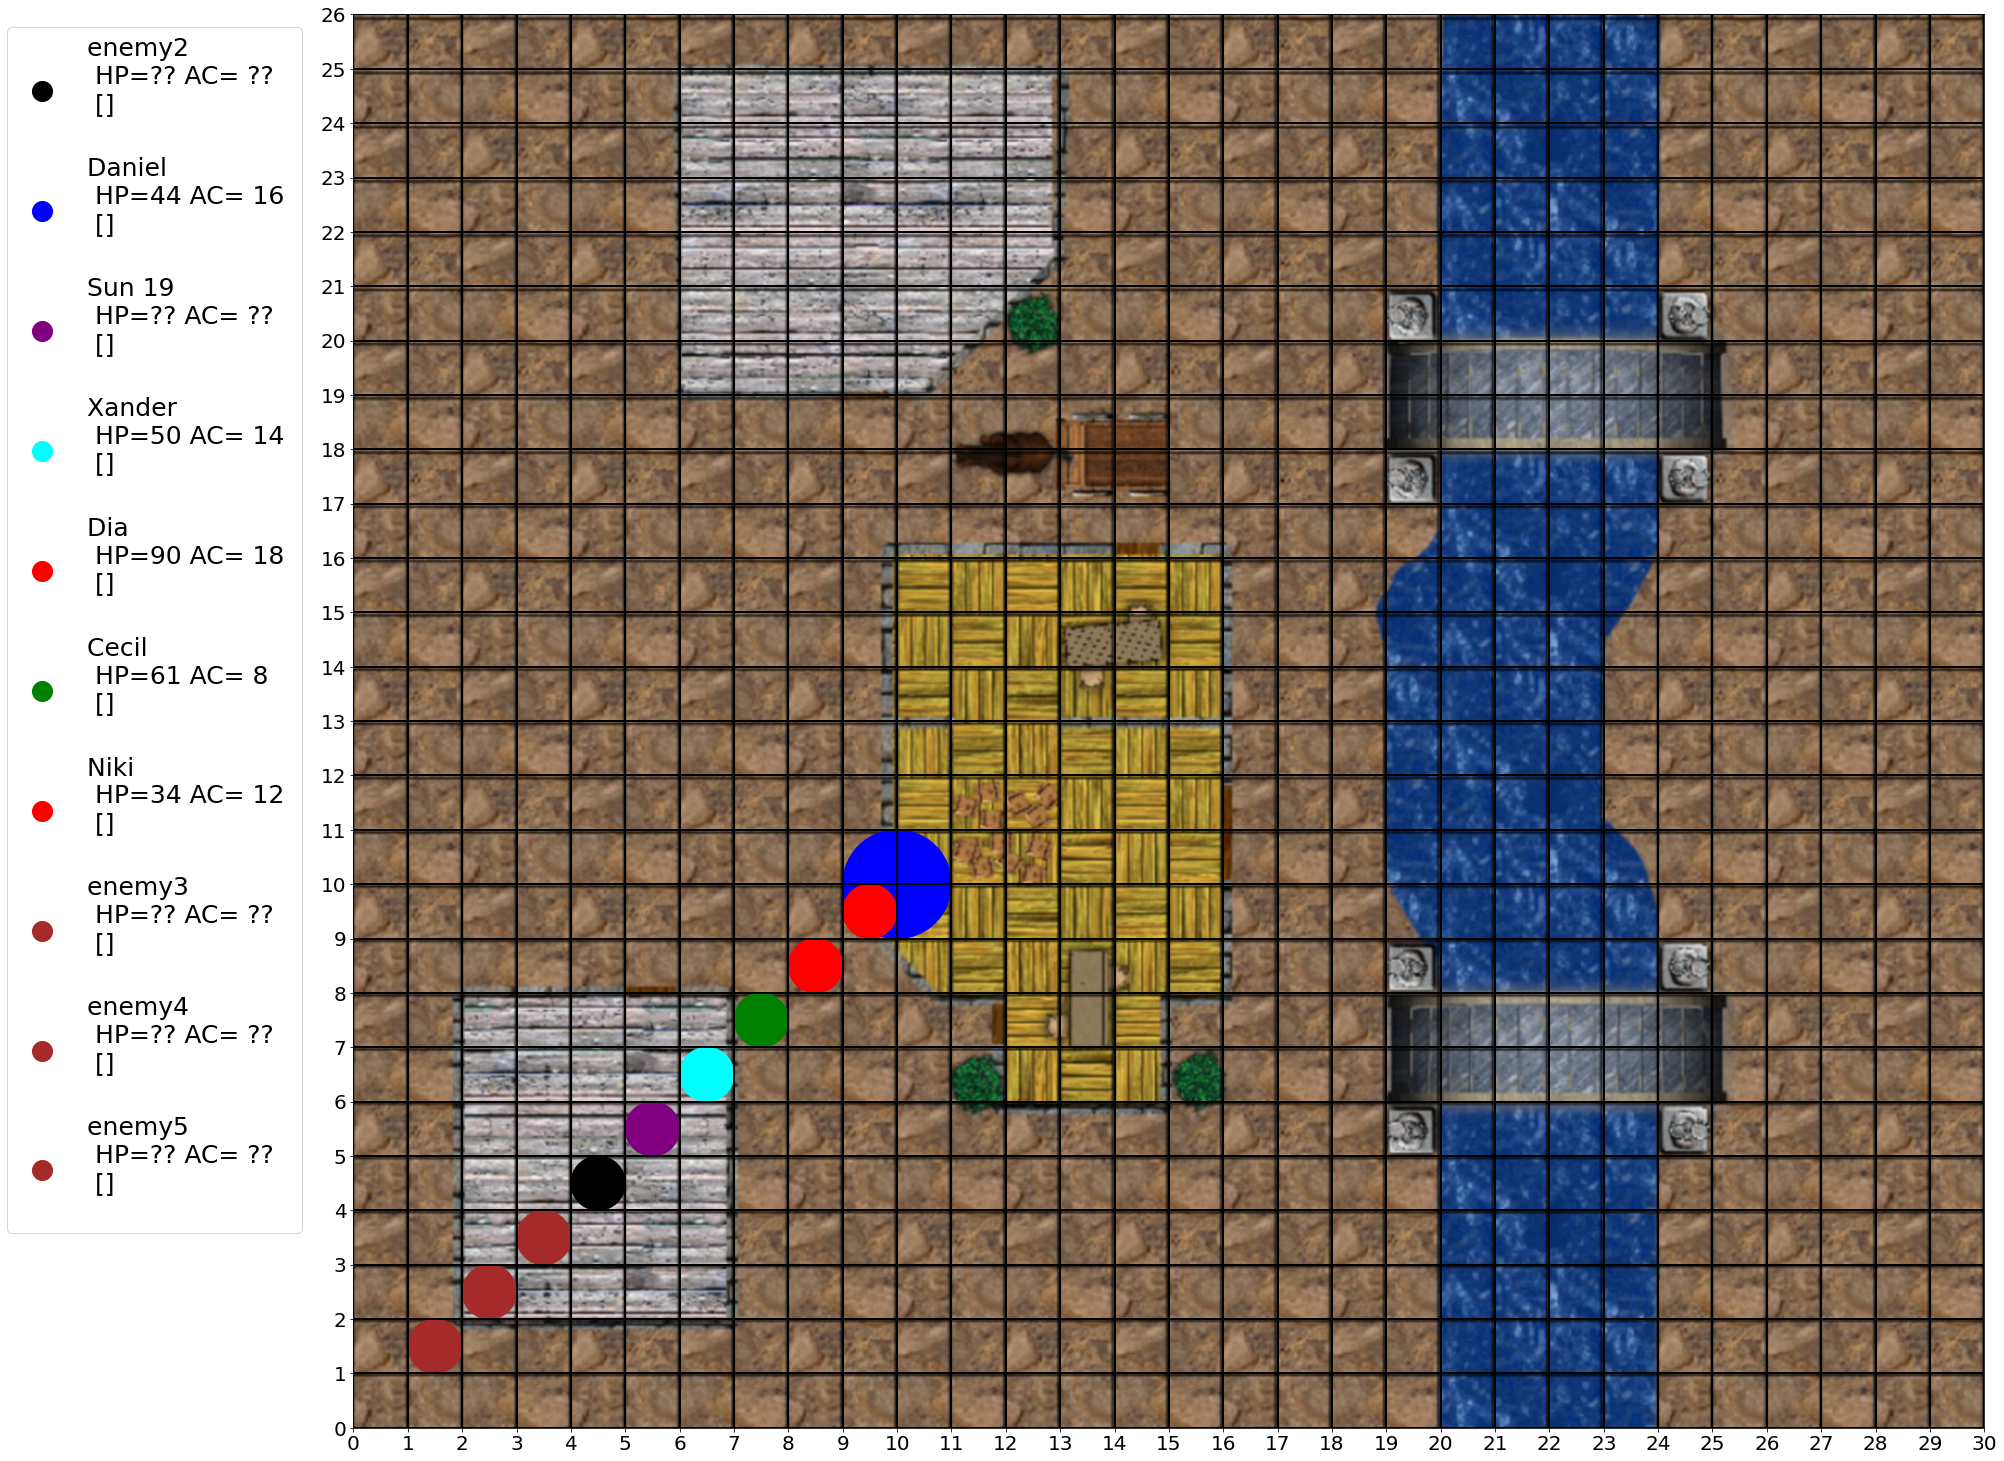

In [4]:
file=r"C:\Users\pacoh\Downloads\dnd maps\dnd map 5 (30x26).jpg"

r=0.5
theta=np.linspace(0,2*np.pi,num=100)
circle=[r*np.cos(theta),r*np.sin(theta)]

square_x=int(file[-10:-8])
square_y=int(file[-7:-5])

img=plt.imread(file)
plt.figure(figsize=(square_x,square_y))

shape=[]

for i in range(len(characters)):
    shape.append([characters[i][7]*circle[0]+characters[i][6][0],characters[i][7]*circle[1]+characters[i][6][1]])

for i in range(len(characters)):
    plt.plot([],[],
             "o", color=characters[i][5], label="{} \n HP={} AC= {} \n {} \n".format(characters[i][0],
                                                                                     characters[i][2],
                                                                                     characters[i][3],
                                                                                     characters[i][4]),
                                                                                     alpha=1)
    
    plt.fill(shape[i][0],shape[i][1], color=characters[i][5])
      
plt.xticks(list(range(0, square_x+1)), fontsize=20)
plt.yticks(list(range(0, square_y+1)), fontsize=20)

plt.grid(color="black", linewidth=2)

legend = plt.legend(fontsize=25,loc="upper left",bbox_to_anchor=[-0.22,1])
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(20)  # If the size of the letters of the legend is too big or too small, you can
                                                 # change the value of "fontsize" to see different options, and if the legend 
                                                 # is too close to the map or to far, you can change the right number of 
                                                 # "bbox_to_anchor" (personal recommendation, change it in terms of 1 decimal or
                                                 # 2 decimal places), and if the colors are too big or small in the legend, you
                                                 # you can change the number of "markersize" to a different one that fits better

#zoom

#plt.xlim(0,30)    #set from which to which numbers of the x axis limit the map to make the crop and the zoom 
#plt.ylim(0,26)    #set from which to which numbers of the y axis limit the map to make the crop and the zoom

plt.imshow(img, extent=[0, square_x, 0, square_y])

plt.show()

# Appendix

###### Here i will leave the sizes that represent each number for the size chart and the description of each condition

## Size chart

|Size                  |Number  |
|:--------------------:|:------:|    
|Fine (max 6in)        |0.1     |
|Diminutive (max 1ft)  |0.2     |
|Tiny (max 2ft)        |0.5     |
|Normal (max 8ft)      |1       |
|Large (max 16ft)      |2       |
|Huge (max 32ft)       |3       |
|Gargantuan (max 64ft) |4       |
|Colossal (>64ft)      |6       |

## Conditions Chart

|Conditions  |Description  |
|:-----------|:------|    
|**Blinded**  | A blinded creature can’t see and automatically fails any ability check that requires sight. Attack rolls against the creature have advantage, and the creature’s attack rolls have disadvantage.|
|**Charmed**  | A charmed creature can’t attack the charmer or target the charmer with harmful abilities or magical effects. The charmer has advantage on any ability check to interact socially with the creature.|
|**Deafened**| A deafened creature can’t hear and automatically fails any ability check that requires hearing.|
|**Frightened**| A frightened creature has disadvantage on ability checks and attack rolls while the source of its fear is within line of sight. The creature can’t willingly move closer to the source of its fear.|
|**Grappled**| A grappled creature’s speed becomes 0, and it can’t benefit from any bonus to its speed. The condition ends if the grappler is incapacitated (see the condition). The condition also ends if an effect removes the grappled creature from the reach of the grappler or grappling effect, such as when a creature is hurled away by the thunderwave spell.|
|**Incapacitated**| An incapacitated creature can’t take actions or reactions.|
|**Invisible**| An invisible creature is impossible to see without the aid of magic or a special sense. For the purpose of hiding, the creature is heavily obscured. The creature’s location can be detected by any noise it makes or any tracks it leaves. Attack rolls against the creature have disadvantage, and the creature’s attack rolls have advantage.|
|**Paralyzed**| A paralyzed creature is incapacitated (see the condition) and can’t move or speak. The creature automatically fails Strength and Dexterity saving throws. Attack rolls against the creature have advantage. Any attack that hits the creature is a critical hit if the attacker is within 5 feet of the creature.|
|**Petrified**| A petrified creature is transformed, along with any nonmagical object it is wearing or carrying, into a solid inanimate substance (usually stone). Its weight increases by a factor of ten, and it ceases aging. The creature is incapacitated (see the condition), can’t move or speak, and is unaware of its surroundings. Attack rolls against the creature have advantage. The creature automatically fails Strength and Dexterity saving throws. The creature has resistance to all damage. The creature is immune to poison and disease, although a poison or disease already in its system is suspended, not neutralized.|
|**Poisoned**| A poisoned creature has disadvantage on attack rolls and ability checks.|
|**Prone**| A prone creature’s only movement option is to crawl, unless it stands up and thereby ends the condition. The creature has disadvantage on attack rolls. An attack roll against the creature has advantage if the attacker is within 5 feet of the creature. Otherwise, the attack roll has disadvantage.|
|**Restrained**| A restrained creature’s speed becomes 0, and it can’t benefit from any bonus to its speed. Attack rolls against the creature have advantage, and the creature’s attack rolls have disadvantage. The creature has disadvantage on Dexterity saving throws.|
|**Stunned**| A stunned creature is incapacitated (see the condition), can’t move, and can speak only falteringly. The creature automatically fails Strength and Dexterity saving throws. Attack rolls against the creature have advantage.|
|**Unconscious**| An unconscious creature is incapacitated (see the condition), can’t move or speak, and is unaware of its surroundings The creature drops whatever it’s holding and falls prone. The creature automatically fails Strength and Dexterity saving throws. Attack rolls against the creature have advantage. Any attack that hits the creature is a critical hit if the attacker is within 5 feet of the creature.|
|**Exhaustion**| Some special abilities and environmental hazards, such as starvation and the long term effects of freezing or scorching temperatures, can lead to a special condition called exhaustion. Exhaustion is measured in six levels. An effect can give a creature one or more levels of exhaustion, as specified in the effect’s description. If an already exhausted creature suffers another effect that causes exhaustion, its current level of exhaustion increases by the amount specified in the effect’s description. A creature suffers the effect of its current level of exhaustion as well as all lower levels. For example, a creature suffering level 2 exhaustion has its speed halved and has disadvantage on ability checks. An effect that removes exhaustion reduces its level as specified in the effect’s description, with all exhaustion effects ending if a creature’s exhaustion level is reduced below 1. Finishing a long rest reduces a creature’s exhaustion level by 1, provided that the creature has also ingested some food and drink.|

#### Exhaustion levels

|Level  |Effect                                          |
|:------|:-----------------------------------------------|
|1      |Disadvantage on ability checks                  |
|2      |Speed halved                                    |
|3      |Disadvantage on attack rolls and saving throws  |
|4      |Hit point maximum halved                        |
|5      |Speed reduced to 0                              |
|6      |Death                                           |